In [3]:
import pandas as pd 
df=pd.read_excel(r'C:\Users\AFAK\saleee.xlsx')
df












,OrderID,Product,Category,Quantity,UnitPrice,OrderDate,Region
0,ORD0001,Headphones,Accessories,4,1078.02,2023-08-15,South
1,ORD0002,Monitor,Electronics,9,700.55,2023-12-01,West
2,ORD0003,Camera,Electronics,10,241.99,2023-12-14,East
3,ORD0004,Mouse,Accessories,2,1407.45,2023-09-09,East
4,ORD0005,Printer,Office,1,53.35,2023-01-03,North
...,...,...,...,...,...,...,...
295,ORD0296,Laptop,Electronics,9,495.82,2023-05-23,North
296,ORD0297,Monitor,Electronics,4,290.32,2023-07-24,North
297,ORD0298,Smartphone,Electronics,5,1476.12,2023-06-29,North
298,ORD0299,Headphones,Accessories,5,793.68,2023-02-22,West


In [5]:
df['OrderDate']=pd.to_datetime(df['OrderDate'])


In [64]:
df['Month']=df['OrderDate'].dt.month
df

,OrderID,Product,Category,Quantity,UnitPrice,OrderDate,Region,Month,totalrevenu
0,ORD0001,Headphones,Accessories,4,1078.02,2023-08-15,South,8,4312.08
1,ORD0002,Monitor,Electronics,9,700.55,2023-12-01,West,12,6304.95
2,ORD0003,Camera,Electronics,10,241.99,2023-12-14,East,12,2419.90
3,ORD0004,Mouse,Accessories,2,1407.45,2023-09-09,East,9,2814.90
4,ORD0005,Printer,Office,1,53.35,2023-01-03,North,1,53.35
...,...,...,...,...,...,...,...,...,...
295,ORD0296,Laptop,Electronics,9,495.82,2023-05-23,North,5,4462.38
296,ORD0297,Monitor,Electronics,4,290.32,2023-07-24,North,7,1161.28
297,ORD0298,Smartphone,Electronics,5,1476.12,2023-06-29,North,6,7380.60
298,ORD0299,Headphones,Accessories,5,793.68,2023-02-22,West,2,3968.40


In [29]:
df=df[df['UnitPrice']>0]
df.isnull().sum()


In [9]:
df=df.dropna()  #df.fullna()
df

,OrderID,Product,Category,Quantity,UnitPrice,OrderDate,Region,Month
0,ORD0001,Headphones,Accessories,4,1078.02,2023-08-15,South,2023-08
1,ORD0002,Monitor,Electronics,9,700.55,2023-12-01,West,2023-12
2,ORD0003,Camera,Electronics,10,241.99,2023-12-14,East,2023-12
3,ORD0004,Mouse,Accessories,2,1407.45,2023-09-09,East,2023-09
4,ORD0005,Printer,Office,1,53.35,2023-01-03,North,2023-01
...,...,...,...,...,...,...,...,...
295,ORD0296,Laptop,Electronics,9,495.82,2023-05-23,North,2023-05
296,ORD0297,Monitor,Electronics,4,290.32,2023-07-24,North,2023-07
297,ORD0298,Smartphone,Electronics,5,1476.12,2023-06-29,North,2023-06
298,ORD0299,Headphones,Accessories,5,793.68,2023-02-22,West,2023-02


# calculat tota Revenue

In [52]:
df['totalrevenu']=df['Quantity']*df['UnitPrice']
df

,OrderID,Product,Category,Quantity,UnitPrice,OrderDate,Region,Month,totalrevenu
0,ORD0001,Headphones,Accessories,4,1078.02,2023-08-15,South,2023-08,4312.08
1,ORD0002,Monitor,Electronics,9,700.55,2023-12-01,West,2023-12,6304.95
2,ORD0003,Camera,Electronics,10,241.99,2023-12-14,East,2023-12,2419.90
3,ORD0004,Mouse,Accessories,2,1407.45,2023-09-09,East,2023-09,2814.90
4,ORD0005,Printer,Office,1,53.35,2023-01-03,North,2023-01,53.35
...,...,...,...,...,...,...,...,...,...
295,ORD0296,Laptop,Electronics,9,495.82,2023-05-23,North,2023-05,4462.38
296,ORD0297,Monitor,Electronics,4,290.32,2023-07-24,North,2023-07,1161.28
297,ORD0298,Smartphone,Electronics,5,1476.12,2023-06-29,North,2023-06,7380.60
298,ORD0299,Headphones,Accessories,5,793.68,2023-02-22,West,2023-02,3968.40


# total revenu for each category

In [78]:
total_revenu=df.groupby('Category')['totalrevenu'].sum()
total_revenu

Category
Accessories    400864.93
Electronics    620959.03
Office         145546.87
Name: totalrevenu, dtype: float64

In [48]:
count_orders=df.groupby('Region')['OrderID'].nunique().sort_values(ascending=False)
t=count_orders.reset_index()
t

,Region,OrderID
0,East,78
1,West,63
2,North,58
3,South,54
4,Central,47


In [38]:
total_revenu=df.groupby('Product')['Quantity'].sum().sort_values(ascending =false).head(10)
df1=total_revenu.reset_index(name='ordermax product')
df1

,Product,ordermax product
0,Smartphone,265
1,Camera,214
2,Printer,214
3,Headphones,197
4,Keyboard,197
5,Laptop,196
6,Monitor,196
7,Mouse,164


#  بعد خسابtotalrevenu طريقه2

In [102]:
maxproduct=df1['totalrevenu'].idxmax()
maxproduct1=df1.loc[maxproduct,['Product']]
maxproduct1.reset_index()

,index,7
0,Product,Smartphone


# شراء من حيث العدد و الكميه تحديد العملاء الاكثر 

In [56]:
costumers=df.groupby('OrderID')['Quantity'].sum().sort_values(ascending=False).reset_index(name='sym pro')
costumers

,OrderID,sym pro
0,ORD0217,10
1,ORD0253,10
2,ORD0250,10
3,ORD0026,10
4,ORD0248,10
...,...,...
295,ORD0245,1
296,ORD0167,1
297,ORD0275,1
298,ORD0012,1


In [58]:
costumers=df.groupby('OrderID')['totalrevenu'].sum().sort_values(ascending=False).reset_index(name='sym pro')
costumers

,OrderID,sym pro
0,ORD0086,14883.00
1,ORD0049,14867.50
2,ORD0231,14822.50
3,ORD0053,14624.70
4,ORD0250,14265.10
...,...,...
295,ORD0012,144.96
296,ORD0147,143.27
297,ORD0016,95.34
298,ORD0194,65.02


In [66]:
monthlysalen=df.groupby('Month')['totalrevenu'].sum().sort_values(ascending=False).reset_index()
monthlysalen

,Month,totalrevenu
0,10,159778.52
1,6,119222.98
2,3,111330.95
3,9,110898.20
4,5,103380.45
5,11,100383.53
6,1,97399.26
7,12,90178.82
8,8,83017.21
9,7,72069.56


In [112]:
monthlysalen2=df.groupby('Month')['Quantity'].sum().sort_values(ascending=False)
monthlysalen2

Month
10    198
11    184
5     167
3     148
1     142
7     139
6     130
12    128
9     121
2     101
8     100
4      85
Name: Quantity, dtype: int64

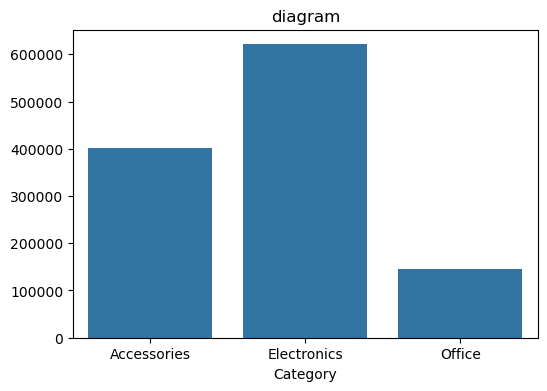

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x=total_revenu.index,y=total_revenu.values)
plt.title('diagram')
plt.show()





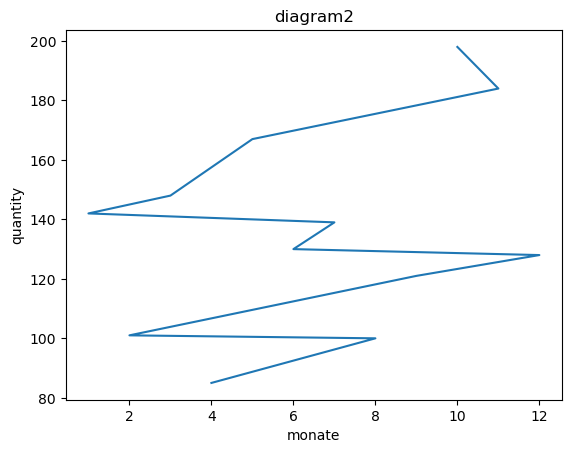

In [120]:
x=monthlysalen2.index
y=monthlysalen2.values

monthlysalen2.plot(kind='line')
plt.title('diagram2')
plt.xlabel('monate')
plt.ylabel('quantity')
plt.show()